# Project 1 - Customer Service Requests Analysis

### From Vivek Gautam

#### Submitted in August 2020

**DESCRIPTION**
<br/>
*Background of Problem Statement :*
NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.
<br/><br/>
**Problem Objective :**
<br/>
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.<br/>
Domain: Customer Service
<br/><br/>
**Analysis Tasks to be performed:**
<br/>
(Perform a service request data analysis of New York City 311 calls) <br/>
Import a 311 NYC service request.<br/>
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)<br/>
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.<br/>
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.<br/>
Perform a statistical test for the following:<br/>
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.<br/>
Whether the average response time across complaint types is similar or not (overall)<br/>
Are the type of complaint or service requested and location related?<br/>

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True

In [9]:
import warnings
warnings.filterwarnings('ignore')

## 1. Import a 311 NYC service request

In [12]:
# read data into a DataFrame
data = pd.read_csv('D:/Data_Science_Data/NYC.csv')

In [13]:
# read data into DataFrame to store original data 
dataOrig = pd.read_csv('D:/Data_Science_Data/NYC.csv')

In [14]:
# Show number of rows and columns
print(data.shape)

(300698, 53)


##### Total 300698 rows and 52 columns present in original dataset

In [15]:
# Dropping duplicate records
data.drop_duplicates(inplace=True)
data.shape

(300698, 53)

##### After dropping duplicate records, there are total 300492 records present in the DataFrame

In [16]:
# Show data from dataframe
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [17]:
# Show column names
#data.keys()
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [18]:
# Information  / details of dataframe, columns, rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [8]:
data['Complaint Type'].unique

<bound method Series.unique of Unique Key
32310363    Noise - Street/Sidewalk
32309934           Blocked Driveway
32309159           Blocked Driveway
32305098            Illegal Parking
32306529            Illegal Parking
                     ...           
30281872         Noise - Commercial
30281230           Blocked Driveway
30283424         Noise - Commercial
30280004         Noise - Commercial
30281825         Noise - Commercial
Name: Complaint Type, Length: 300492, dtype: object>

##### There are total 298329 types of complaints

In [7]:
data['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [19]:
# Finding null values in DataFrame
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

<br/>*Missing values are available in column 'Closed Data', so we will fill those values with the mode value because we need to use the values from this column for further processing*

In [20]:
complaintTypecity = pd.DataFrame({'count': data.groupby(['Complaint Type','City']).size()}).reset_index() 
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [21]:
data.loc[:,['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
300693,Noise - Commercial,NaN
300694,Blocked Driveway,RICHMOND HILL
300695,Noise - Commercial,BROOKLYN
300696,Noise - Commercial,BRONX


In [22]:
data.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

## 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [25]:
# Count total number of null values present in column 'Closed Date' of dataframe 
data['Closed Date'].isna().sum()

2164

In [ ]:
# find mode of Closed Date column
#mode_closed_date = data['Closed Date'].mode()
#mode_closed_date

In [26]:
data.shape

(300698, 53)

In [27]:
# Drop records with null values present in the column 'Closed Date' of dataframe
data.drop(data[data['Closed Date'].isna()].index, inplace = True)
data['Closed Date'].isna().sum()

0

In [28]:
# Find number of rows and columns after dropping null values in the column 'Closed Date' of dataframe
data.shape

(298534, 53)

In [ ]:
# fill NaN values in column 'Closed Date' by mode value
# data['Closed Date'].fillna('2015-11-08 07:34:00',  inplace=True) 
#data['Closed Date'].fillna('11-08-15 7:34',  inplace=True) 

In [29]:
# Count total number of null values present in column 'Closed Date' of dataframe 
data['Created Date'].isna().sum()

0

##### Now, Missing values are not present in the columns 'Created Date' as well as 'Closed Date' 

In [30]:
# Read / Show data from column 'Created Date' from original file (Before converting into datetime datatype)
data[['Created Date','Closed Date']].head()

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24


In [31]:
# Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 
data['Created Date']=pd.to_datetime(data['Created Date'],infer_datetime_format=True)
data['Closed Date']=pd.to_datetime(data['Closed Date'],infer_datetime_format=True)

In [89]:
# columns ‘Created Date’ and Closed Date’ after converting to datetime datatype 
data[['Created Date','Closed Date']].head()

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:00
1,2015-12-31 23:59:44,2016-01-01 01:26:00
2,2015-12-31 23:59:29,2016-01-01 04:51:00
3,2015-12-31 23:57:46,2016-01-01 07:43:00
4,2015-12-31 23:56:58,2016-01-01 03:24:00


In [90]:
# create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
data['Request_Closing_Time'] =data['Closed Date'] - data['Created Date']
print(data['Request_Closing_Time'].head(10))

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
5   01:53:30
6   01:57:28
7   01:47:55
8   08:33:02
9   01:23:02
Name: Request_Closing_Time, dtype: timedelta64[ns]


## 3. Provide major insights / patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

### Insight 1 - Finding count of each Complaint Tpye

In [106]:
# Finding number of complaints
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

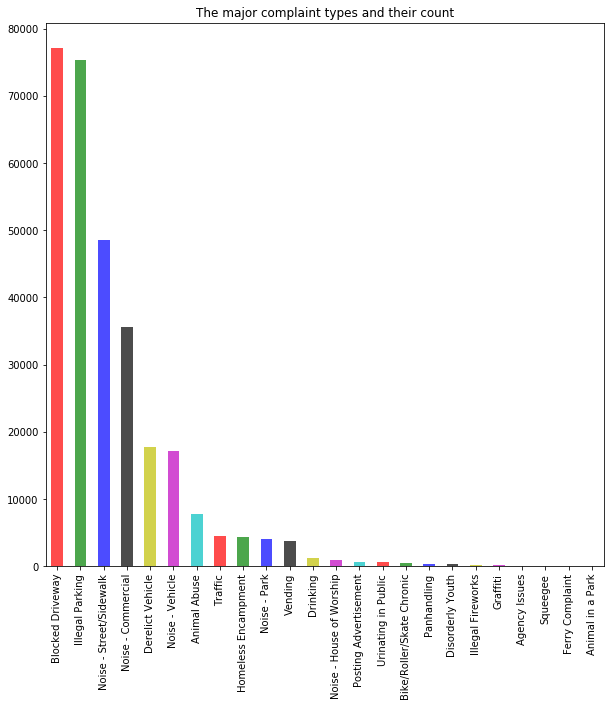

In [118]:
# Plot the count of each complaint
#plt.figure(figsize=(20, 6))
#sns.countplot(x='Complaint Type', data=data, order=data['Complaint Type'].value_counts().iloc[:].index)

major=data.loc[:,"Complaint Type"]
top=major.value_counts()
top.plot(kind='bar', color=list('rgbkymc'), alpha=0.7, figsize=(10,10),title='The major complaint types and their count')

##### Top 5 complaints are Blocked Driveway, Illegal Parking, Noise - Street/Sidewalk, Noise - Commercial and Derelict Vehicle

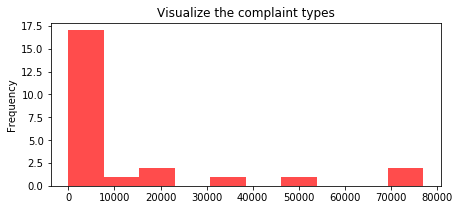

In [114]:
#Visualize the complaint types
top.plot(kind='hist', color=list('rgbkymc'), alpha=0.7, figsize=(7,3),title='Visualize the complaint types')

### Insight 2 - Finding count of Descriptors

In [119]:
# Finding number of complaints
data['Descriptor'].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


In [ ]:
# Plot the count of top 10 Descriptor
plt.figure(figsize=(22, 6))
sns.countplot(x='Descriptor', data=data, order=data['Descriptor'].value_counts().iloc[:10].index)

##### Top 5 complaints are Loud Music/Party, No Access, Posted Parking Sign Violation, Loud Talking and Partial Access

### Insight 3 - Finding count of Locations and frequent location type

In [120]:
# Finding number of complaints
data['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Terminal                           1
Park                               1
Name: Location Type, dtype: int64

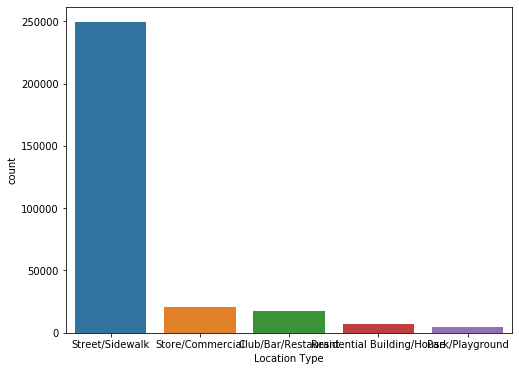

In [123]:
# Plot the count of top 10 Descriptor
plt.figure(figsize=(8, 6))
sns.countplot(x='Location Type', data=data, order=data['Location Type'].value_counts().iloc[:5].index)

##### Top 5 Locations are Street/Sidewalk, Store/Commercial, Club/Bar/Restaurant, Residentia Building/House, and Park/Playground
##### Most frequent location type is Street/Sidewalk with 247434 complaints

### Insight 4 - Plot Request Closing Time

In [37]:
#Insight - 1 - Categorize Request_Closing_Time as follows -
#Below 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
#For this, first will create new column Request_Closing_In_Hr and then create new column - Request_Closing_Time_Category

In [93]:
#Function to convert TimeDelta in Hour

def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    #print(days)
    #print(hours)
    return result
    #return round(pd.Timedelta(timeDel).seconds / 3600, 2)

In [94]:
test_days = data[data['Unique Key'] == 32122264]['Request_Closing_Time'] 
print(toHr(test_days[27704]))
print(test_days[27704])
print(test_days.dtype)

145.08
6 days 01:05:00
timedelta64[ns]


In [95]:
# Apply this function to every row of column Request_Closing_Time
data['Request_Closing_In_Hr'] = data['Request_Closing_Time'].apply(toHr)
data['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [65]:
import math

In [96]:
# Function to categorize hours - Less than 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, 
# More than 6 hours - Very Slow

def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Testing function
print(hrToCategory(1.99))

#Insight 2
#Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr
data['Request_Closing_Time_Category'] = data['Request_Closing_In_Hr'].apply(hrToCategory)
data['Request_Closing_Time_Category'].head()

Fast


0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

In [97]:
data['Request_Closing_Time_Category'].value_counts()

Fast           115550
Acceptable      77195
Very Slow       63388
Slow            42401
Unspecified      2164
Name: Request_Closing_Time_Category, dtype: int64

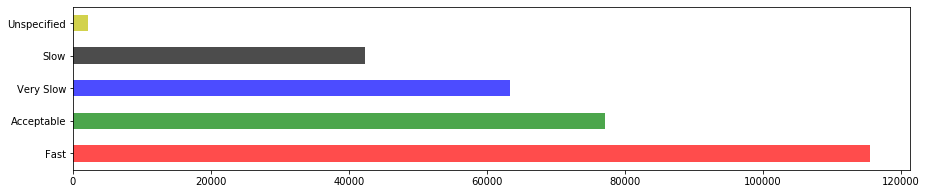

In [98]:
#Create Bar plot for Request_Closing_Time_Category to check frequency in Request_Closing_Time_Category and it prove 
#Most count is in Fast category means closed less than 2 hours 
data['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3)) 
plt.show()

##### It seems that, most of the complaints resolved in less time.  

### Insight 5 - Plot Frequency of complaints monthwise

In [99]:
# Insight 1 - To check with Month have Complain creation most and least
#We will create one column with Create_Month name
#Created Series for months in text format

monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [100]:
import datetime as dt
import time, datetime

In [101]:
data['Created Date'].dtype

# Function to fetch month from Created Date column
def getMonth(cDate):
    a = str(cDate)
    DateTime = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return monthSeries[DateTime.month]

#Test function getMonth 
print(data['Created Date'][0]) 
print(getMonth(data['Created Date'][0]))

2015-12-31 23:59:45
Dec


In [102]:
# Created new column Created_Month and kept all text format months in that column
data['Created_Month'] = data['Created Date'].apply(getMonth)
data['Created_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object

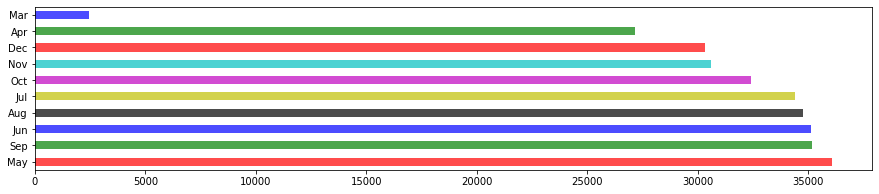

In [82]:
data['Created_Month'].value_counts()

#Create Bar plot for Complain Created Month to check frequency and it prove Most count is in May month and least is in March a nd in January there is no any complain
data['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3)) 
plt.show()

##### Most of the complaints get registered in the month of May

In [104]:
# To confirm doubt of January doesn't have any value, we used original dataframe and check if any entry for Jan month 
dataOrig[dataOrig['Created Date'].str.startswith('01/')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [124]:
# To confirm doubt of January doesn't have any value, we used original dataframe and check if any entry for Jan month 
dataOrig[dataOrig['Created Date'].str.startswith('02/')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


##### No complaints registered in the month of JAnuary and February

### Insight 6 - Draw Bar plot for Status

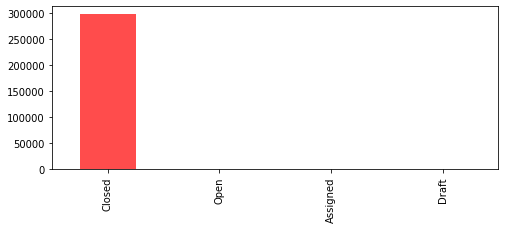

In [126]:
#style.use('ggplot')

data['Status'].value_counts().plot(kind='bar', color=list('rgbkymc'), alpha=0.7, figsize=(8,3))
plt.show()

In [ ]:
sns.distplot(data.Request_Closing_Time)

In [ ]:
#Function that can detect outlier
def outlierDetection(datacolumn):
    #Sort in Ascending
    sorted(datacolumn)
    #Get Q3 and Q1
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [ ]:
lr,ur = outlierDetection(data.Request_Closing_Time)
lr,ur

In [ ]:
data.drop(data[(data.Request_Closing_Time > ur) | (data.Request_Closing_Time < lr)].index , inplace=True )

In [ ]:
data.shape

In [ ]:
sns.distplot(data.Request_Closing_Time)

## 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [ ]:
#Gouping_Closing_Time = data.sort_values(data['Request_Closing_Time'].mean(), ascending = 'True')
#Gouping_Closing_Time = data.groupby('Request_Closing_Time').mean()
#Gouping_Closing_Time

In [ ]:
# Order the complaint types based on the average ‘Request_Closing_Time’
#Gouping_Closing_Time = data.sort_values(data['Request_Closing_Time'].mean(), ascending = 'True')

In [127]:
#For location we can choose here City, so first check if there is missing 
data['City'].isnull().sum()

2614

In [129]:
# Fill all missing value with some default value here i used - Not Available 
data['City'].fillna('Not Available', inplace=True)
data['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [137]:
#Group them for City (location) first and Complain Type in that
df_data_grouped = data.groupby(['City', 'Complaint Type'])

In [139]:
#get average of this grouped dataframe, and get Request_Closing_Time column from there 
data_mean = df_data_grouped.mean()['Request_Closing_In_Hr']
data_mean.isnull().sum()

4

In [147]:
# Group by City(location) first and then Complain Type and showing average of Request Closing in Hour 
df_data_grouped = data.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'}) 
print(df_data_grouped.shape)
df_data_grouped

(782, 1)


Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [141]:
# Check if any value is NaN
df_data_grouped[df_data_grouped['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [142]:
# drop null values from this group
df_data_grouped_withoutna = df_data_grouped.dropna()

In [143]:
# verify if new group has null values
df_data_grouped_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [148]:
# verify number of rows after dropping null values
print(df_data_grouped_withoutna.shape)
df_data_grouped_withoutna

(778, 1)


Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]

In [149]:
# Sorting by column - Request_Closing_In_Hr for City on grouped
df_data_sorted = df_data_grouped_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])
df_data_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]